In [6]:
# Warmup 0: A function to load a csv file
#
import csv

# source:  Automate the Boring Stuff with Python Ch 12
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

In [8]:
# Load the survey data and split into survey_header and survey_data
# (this will be used later in the lecture)

survey_csv = process_csv('cs220_survey_data.csv')
survey_header = survey_csv[0]
survey_data = survey_csv[1:]

print(len(survey_csv))
print(len(survey_data))
print(len(survey_header)) # TODO: Explain why this is 15?

804
803
15


In [ ]:
survey_header

In [17]:
# these lists hold parallel information about the island names in the Caribbean, the type of pie that is sold on the island,
# and the price of a slice of the pie
# Caribbean Pie Rates data

island_list = ["Aruba", "Jamaica", "Antigua", "Saint Martin", "Saint Kitts", "Grand Cayman", "Cuba", "Grenada", "Tobago", "Trinidad"]
pie_list = ["Apple", "Apple", "Blueberry", "Pecan", "Tart", "Blueberry", "Chocolate Cream", "Key Lime", "Banana Cream", "Apple" ]
rate_list = [5.99, 3.99, 7.49, 4.99, 2.99, 4.99, 5.00, 2.00, 3.99, 4.49]
len(rate_list)

for i in range(len(island_list)):
    print(island_list[i],pie_list[i],rate_list[i])

Aruba Apple 5.99
Jamaica Apple 3.99
Antigua Blueberry 7.49
Saint Martin Pecan 4.99
Saint Kitts Tart 2.99
Grand Cayman Blueberry 4.99
Cuba Chocolate Cream 5.0
Grenada Key Lime 2.0
Tobago Banana Cream 3.99
Trinidad Apple 4.49


In [19]:
# warmup 1
# TODO: this code attempts to find the island that sells the cheapest pie and then print out
# the type of pie, the price, and the island it is sold on.
# **this code is broken in several ways**
# fix all of the bugs and get it working correctly
# Caribbean Pie Rates program

best_rate = 0
best_pie = None
rate_list.sort()
for rate in rate_list:
    if best_pie == None or best_rate > rate:
        best_rate = rate_list.index(rate)
        best_price = rate
        best_island = island_list[best_rate]
    else:
        best_rate = rate_list.index(rate)
        best_price = rate
        best_island = island_list[best_rate]
print("The cheapest pie is on {}".format(best_island))

The cheapest pie is on Trinidad


In [21]:
# Warmup 1: Write code to answer the following questions about english_dict
english_dict = {
    "shenanigans": "silly or high-spirited behavior; mischief.",
    "bamboozle": "fool or cheat (someone).",
    "gubbins": "(objects) of little to no value.",
    "malarkey": "nonsense, rubbish.",
    "gnarly": "gnarled."
}

In [5]:
# Warmup 1a: What is the definition of "gubbins"?
english_dict["gubbins"]

'(objects) of little to no value.'

In [6]:
# Warmup 1b: How many words are in our dictionary?
len(english_dict)

5

In [7]:
# Warmup 1c: Is "badger" in our dictionary?
"badger" in english_dict

False

In [8]:
# Warmup 1d: Is "bamboozle" in our dictionary?
"bamboozle" in english_dict

True

In [10]:
# Warmup 1d: Is "nonsense, rubbish." a value in our dictionary?
"nonsense, rubbish." in english_dict.values()

True

In [ ]:
# Warmup 1e: How many definitions have the word "or" appear in them?
count = 0
for english_word in english_dict:
    pass
count

In [ ]:
# Warmup #2: answer these Q's about dictionaries

# Keys can be what type?   
# Values can be what type?  
# Are dictionaries mutable?

In [ ]:
# Warmup #3: answer these Q's about how to do each of the following with dictionaries:

# How do you lookup an item in a dictionary?
# How do you insert a new item into a dictionary?
# How do you update/change an item in a dictionary?
# How do you remove an item from a dictionary?

# CS220: Lecture 18


## Learning Objectives
After this lecture you will be able to...
 - Handle key errors with get and pop using default values
 - Understand the idea of nesting data structures
 - Use a dictionary of lists to put rows of data into "buckets"
 - Use a list of dictionaries to represent a table of data.
 - Create a dictionary of dictionaries



### What errors that can occur with get and pop?

In [27]:
suffix = {1:"st", 2:'nd', 3:"rd"}

# what happens when you try to access a key that is not there? 
print(suffix[5])  # key errors

# what happens when you try to pop a key that is not there?
suffix.pop(4)

# One way to protect from getting an error is to use a conditional
if 4 in suffix: # safe programming
    suffix.pop(4) # key errors
else:
    print("Skipped!")

Skipped!


In [5]:
# There is a better way to access and pop from a dictionary.
# Take a look at the help for these methods:
x={}
help(x.get)
help(x.pop)

Help on built-in function get:

get(key, default=None, /) method of builtins.dict instance
    Return the value for key if key is in the dictionary, else default.

Help on built-in function pop:

pop(...) method of builtins.dict instance
    D.pop(k[,d]) -> v, remove specified key and return the corresponding value.
    
    If the key is not found, return the default if given; otherwise,
    raise a KeyError.



In [36]:
# How to fix it....add a 2nd argument # safer programming

# fix it with the get(key, default) method
# print(suffix.get(5, 'th'))
#print(suffix.get(5, 'th')) #default value, but does not add the key

# what happens when you try to pop a key that is not there? 
#print(suffix.pop(7, 'th'))
print(suffix.pop(5, 'th'))

#print(suffix)

th


# Nesting


Putting one data structure inside of another.

We've done this with control structures...
 - a conditional inside a conditional
 - a loop inside a loop
 - a conditional inside a loop
 - ... and so on...

 
We can also do...
 - a list inside a list
 - a dict inside a dict
 - a list inside a dict
 - ... and so on...

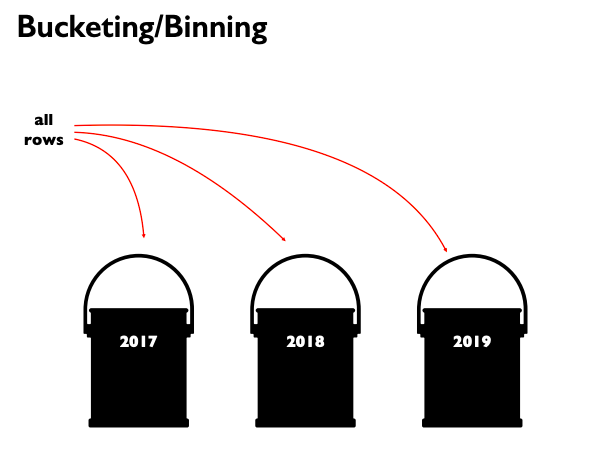



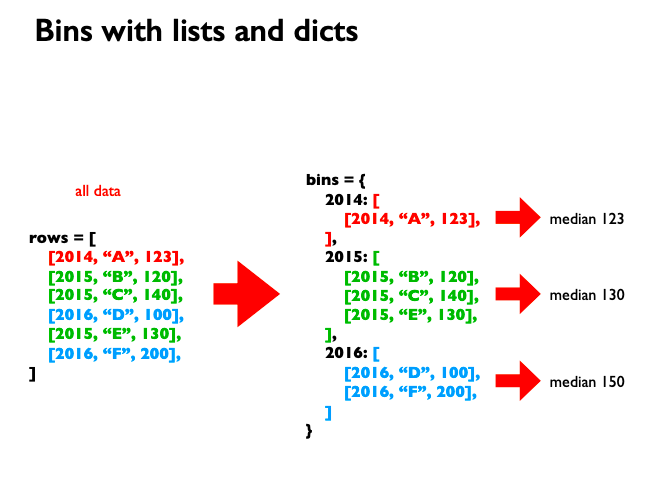

What is it?
 - Start with an empty Dictionary
 - Read a row
  - Keys are entries from one of the colums of the data
  - Each key's associated value is a list of lists
 - Each row of data ends up in some bin

Why bucket data?
 - A way to organize our data, without losing information in the process



In [28]:
rows = [
    [2014, "A", 123],
    [2015, "B", 120],
    [2015, "C", 140],
    [2016, "D", 100],
    [2015, "E", 130],
    [2016, "F", 200]
]

bins = {}
for row in rows:
    year = row[0]
    if year not in bins:
        bins[year]=[]
    bins[year].append(row)

bins

{2014: [[2014, 'A', 123]],
 2015: [[2015, 'B', 120], [2015, 'C', 140], [2015, 'E', 130]],
 2016: [[2016, 'D', 100], [2016, 'F', 200]]}

In [ ]:
#TODO: calculate the average of the of the last column for the year 2015

total=0
for row in bins[2015]:
    pass

## Applications

Let's bucket data from the CS220 Survey.

As a refresher, run the below cells to see some of the data.

In [ ]:
survey_header

In [ ]:
survey_data[0]

In [30]:
# The cell function will also be useful!
# It returns the cell at row_idx with col_name as the appropriate type.
# If there is nothing in the cell, it returns None.
def cell(row_idx, col_name):
    col_idx = survey_header.index(col_name)
    val = survey_data[row_idx][col_idx]
    return val

In [ ]:
# Example 1: Place the data into buckets by lecture
# Key:   name of lecture ("LEC001", "LEC002", etc.)
# Value: a list of all the rows that go with that lecture (list of lists)

#TODO complete the code below to populate the lecture_sections dictionary

lecture_sections = {}

for i in range(len(survey_data)):
    current_student = survey_data[i]
    current_lecture = cell(i, 'Lecture')
    pass
    
print(sorted(list(lecture_sections.keys()))) # print all the lecture sections
print(len(lecture_sections['LEC002'])) # print how many LEC002 students completed the survey
print(survey_header)
print(lecture_sections['LEC002'][2]) # print the third student to complete the survey for LEC002

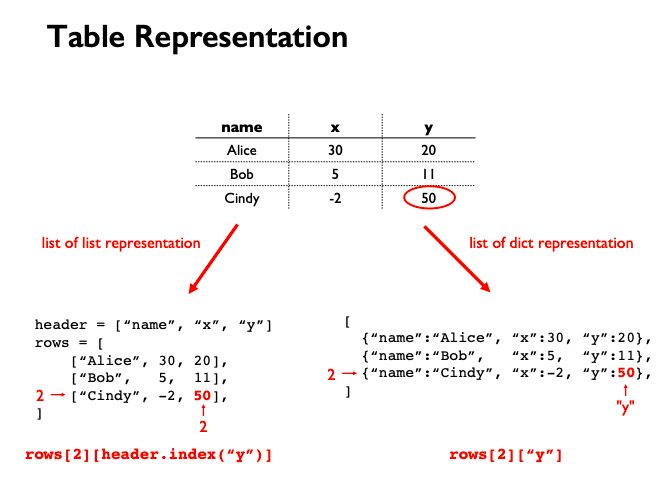
What is it?
 - Start with an empty list
 - Each row of data is one dictionary
  - keys are the column names
  - values are the data in each cell
 - Makes a list of dictionaries

Why put data in table form?
 - It seems redundant, but is used often in computer apps for storing info
 - Its a little easier to access subsets of the data without worrying about the header

In [ ]:
survey_header

In [36]:
# Let's put the student survey data into a list of dictionaries
students_info = [] # list of dictionaries
for i in range(len(survey_data)):
    current_row = survey_data[i]
    current_student = {}
    for col_name in survey_header:
        current_student[col_name] = cell(i, col_name)
    students_info.append(current_student)

print(list(students_info[278].keys())) # print all the keys for a particular student
print()
print(len(students_info)) # print how many students completed the survey
print()
print(students_info[3]) # print the forth student to complete the survey
print()
print(students_info[3]['Age']) # print the student's age

['Section', 'Lecture', 'Age', 'Primary Major', 'Other Primary Major', 'Other Majors', 'Zip Code', 'Latitude', 'Longitude', 'Pizza Topping', 'Cats or Dogs', 'Runner', 'Sleep Habit', 'Procrastinator', 'Song']

803

{'Section': 'COMP SCI 220:LAB313, COMP SCI 220:LEC001', 'Lecture': 'LEC001', 'Age': '19', 'Primary Major': 'Engineering: Mechanical', 'Other Primary Major': '', 'Other Majors': '', 'Zip Code': '53,092', 'Latitude': '41', 'Longitude': '88', 'Pizza Topping': 'sausage', 'Cats or Dogs': 'dog', 'Runner': 'No', 'Sleep Habit': 'night owl', 'Procrastinator': 'Yes', 'Song': 'none'}

19


## Nesting: Dictionary of Dictionaries

In [37]:
nested_english_dict = {
    "shenanigans": {
        "definition": "silly or high-spirited behavior; mischief.",
        "usage": "widespread financial shenanigans had ruined the fortunes of many",
        "fun_to_say": 7 # on a scale of 1-10
    },
    "bamboozle": {
        "definition": "fool or cheat (someone).",
        "usage": "Tom Sawyer bamboozled the neighborhood boys into painting for him",
        "fun_to_say": 8 # on a scale of 1-10
    },
    "gubbins": {
        "definition": "(objects) of little to no value.",
        "usage": "I cleared all the gubbins off my desk before I started working",
        "fun_to_say": 10 # on a scale of 1-10
    },
    "malarkey": {
        "definition": "meaningless talk; nonsense.",
        "usage": "don't give me that malarkey",
        "fun_to_say": 5 # on a scale of 1-10
    },
    "gnarly": {
        "definition": "gnarled.",
        "usage": "twisted trees and gnarly roots",
        "fun_to_say": 2 # on a scale of 1-10
    }
}

In [38]:
# Get the definition, usage, and score of 'malarkey'
nested_english_dict['malarkey']

{'definition': 'meaningless talk; nonsense.',
 'usage': "don't give me that malarkey",
 'fun_to_say': 5}

In [59]:
# Get the definition of 'shenanigans'
nested_english_dict['shenanigans']['definition']

'silly or high-spirited behavior; mischief.'

In [61]:
# Get the usage of 'gubbins'
nested_english_dict['gubbins']['usage']

'I cleared all the gubbins off my desk before I started working'

In [39]:
# Print out each word and its corresponding definition
# TODO: finish this code
for word in nested_english_dict:
    pass

In [40]:
# average of fun_to_say for all words in dictionary
total = 0
for word in nested_english_dict:
    info = nested_english_dict[word]
    total += info['fun_to_say']
    
print(total/len(nested_english_dict)) # be safer, check if count is 0 

6.4


In [ ]:
# Let the user enter a word.
# If it has a fun_to_say of more than 6, print :)
#                           more than 3, print :|
#                           otherwise    print :(
choosen_word = input("Enter a word to lookup: ")
???
    


More Examples: https://www.w3schools.com/python/python_dictionaries_nested.asp

In [43]:
#KEY: player name VALUE: player score
scores = { "bob" : 0,
           "alice": 0 }

def do_set(cmd):
    # why do we need this?
    global scores
    
    name = cmd[1]
    score = int(cmd[2])
    scores[name] = score
    
def do_get(cmd):
    name = cmd[1]
    if name in scores:
        print(scores[name])
    else:
        print("unknown name")
    
def do_print():
    for person in scores:
        print(person, ':', scores[person])
        
def do_high():
    # PASS 1: find the best score
    best_player = None
    for player in scores:
        if best_player == None or scores[player] > scores[best_player]:
            best_player = player

    # PASS 2: find all players with the best score
    winners = []
    for player in scores:
        if scores[player] == scores[best_player]:
            winners.append(player)

    if len(winners) == 1:
        print ("Only winner is:", winners[0])
    else:
        tie = ", ".join(winners)
        print("Tie for win between:", tie)

def do_help():
    print('Commands:')
    print('help')
    print('  print list of commands')
    print('set <name> <score>')
    print('  updates score of player with given name')
    print('get <name>')
    print('  gets the score of player with given name')  
    print('print')
    print('  prints all the scores')
    print('high')
    print('  print high score')
    print('quit')
    print('  quit program')

while True:
    cmd = input('enter a cmd (type "help" for descriptions): ')
    cmd = cmd.strip().lower().split(' ')

    if cmd[0] == 'quit':
        break
    elif cmd[0] == 'help':
        do_help()
    elif cmd[0] == 'print':
        do_print()
    elif cmd[0] == 'set':
        do_set(cmd) # why do we pass cmd here?
    elif cmd[0] == 'get':
        do_get(cmd) # why do we pass cmd here?
    elif cmd[0] == 'high':
        do_high()

print('exiting')

enter a cmd (type "help" for descriptions):  help


Commands:
help
  print list of commands
set <name> <score>
  updates score of player with given name
get <name>
  gets the score of player with given name
print
  prints all the scores
high
  print high score
quit
  quit program


enter a cmd (type "help" for descriptions):  get bob


0


enter a cmd (type "help" for descriptions):  set alice 5
enter a cmd (type "help" for descriptions):  get alice


5


enter a cmd (type "help" for descriptions):  get george


unknown name


enter a cmd (type "help" for descriptions):  set george 4
enter a cmd (type "help" for descriptions):  get george


4


enter a cmd (type "help" for descriptions):  quit


exiting
